<h1>Initial data cleancing and creation of a table with movies and the statistical analysis of the commercial performance thereof</h1>

In [6]:
# Importing the initial libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import psycopg2

In [7]:
# Connect database to jupyter 
connect = psycopg2.connect(dbname='dvdrental', user='postgres', password='fhjgkl567', host='localhost')
connect

<connection object at 0x0000020E8BED2590; dsn: 'user=postgres password=xxx dbname=dvdrental host=localhost', closed: 0>

In [8]:
# Writing queties for needed tables from database 
query = 'SELECT * FROM film;'
query2= 'SELECT * FROM actor'
query3= 'SELECT * from inventory'
query4 = 'SELECT * FROM rental'
query5 = 'SELECT * FROM customer'
query6 = 'SELECT * FROM address'
query7 = 'SELECT * FROM city'
query20 = 'SELECT * FROM payment'

In [9]:
# making connections with PostgreSQL database
df_film = pd.read_sql_query(query, connect)
df_actor = pd.read_sql_query(query2, connect)
df_inventory = pd.read_sql_query(query3, connect)
df_rental = pd.read_sql_query(query4, connect)
df_customer = pd.read_sql_query(query5, connect)
df_address = pd.read_sql_query(query6, connect)
df_city = pd.read_sql_query(query7, connect)
df_payment = pd.read_sql_query(query20, connect)

C:\Users\vblei\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\vblei\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\vblei\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\vblei\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqli

In [10]:
# Taking look at the column values in table film
for column in df_film.columns:
    print(column)
    print(df_film[column].unique())

film_id
[ 133  384    8   98    1    2    3    4    5    6    7    9   10   11
   12  213   13   14   15   16   17   18   19   20   21   22   23   24
   25   26   27   28   29   30   31   32   33   34   35   36   37   38
   39   40   41   42  265   43   44   45   46   47   48   49   50  126
   51   52   53   54   55   56   57   58   59   60   61   62   63   64
   65   66   67   68   69   70   71   72   73   74   75   76   77   78
   79   80   81   82   83   84   85   86   87   88   89   90   91   92
   93   94   95   96   97   99  100  101  102  103  104  105  106  107
  108  109  110  111  112  113  114  115  116  117  118  119  120  121
  122  123  124  125  127  128  129  130  131  132  134  135  154  136
  137  138  139  140  141  142  143  144  145  146  147  148  149  150
  151  152  153  155  156  157  158  159  160  161  162  163  164  184
  165  166  167  168  169  170  171  172  173  174  175  176  177  178
  179  180  181  182  183  185  186  187  188  189  190  191  192  19

TypeError: unhashable type: 'list'

In [11]:
# check for possible Na values
df_film['title'].isna().value_counts()

False    1000
Name: title, dtype: int64

<h2>Let us create a table with only relevant for our analysis columns</h2>


In [12]:
# we are interested in the following columns:
df_film_title = df_film[['film_id', 'title', 'rental_rate']]
df_film_title

,film_id,title,rental_rate
0,133,Chamber Italian,4.99
1,384,Grosse Wonderful,4.99
2,8,Airport Pollock,4.99
3,98,Bright Encounters,4.99
4,1,Academy Dinosaur,0.99
...,...,...,...
995,996,Young Language,0.99
996,997,Youth Kick,0.99
997,998,Zhivago Core,0.99
998,999,Zoolander Fiction,2.99


In [13]:
# Let us take a look at inventory table
for column in df_inventory.columns:
    print(column)
    print(df_inventory[column].unique())

inventory_id
[   1    2    3 ... 4579 4580 4581]
film_id
[   1    2    3    4    5    6    7    8    9   10   11   12   13   15
   16   17   18   19   20   21   22   23   24   25   26   27   28   29
   30   31   32   34   35   37   39   40   42   43   44   45   46   47
   48   49   50   51   52   53   54   55   56   57   58   59   60   61
   62   63   64   65   66   67   68   69   70   71   72   73   74   75
   76   77   78   79   80   81   82   83   84   85   86   88   89   90
   91   92   93   94   95   96   97   98   99  100  101  102  103  104
  105  106  107  109  110  111  112  113  114  115  116  117  118  119
  120  121  122  123  124  125  126  127  129  130  131  132  133  134
  135  136  137  138  139  140  141  142  143  145  146  147  149  150
  151  152  153  154  155  156  157  158  159  160  161  162  163  164
  165  166  167  168  169  170  172  173  174  175  176  177  178  179
  180  181  182  183  184  185  186  187  188  189  190  191  193  194
  196  197  199  200

In [14]:
# checking for Na valuesi n the table
df_inventory.isna().value_counts()

inventory_id  film_id  store_id  last_update
False         False    False     False          4581
dtype: int64

In [15]:
# We will now join the new table for inventory table from original database
id_store_film_id = df_inventory.merge(df_film_title, on='film_id')
id_store_film_id

,inventory_id,film_id,store_id,last_update,title,rental_rate
0,1,1,1,2006-02-15 10:09:17,Academy Dinosaur,0.99
1,2,1,1,2006-02-15 10:09:17,Academy Dinosaur,0.99
2,3,1,1,2006-02-15 10:09:17,Academy Dinosaur,0.99
3,4,1,1,2006-02-15 10:09:17,Academy Dinosaur,0.99
4,5,1,2,2006-02-15 10:09:17,Academy Dinosaur,0.99
...,...,...,...,...,...,...
4576,4577,1000,1,2006-02-15 10:09:17,Zorro Ark,4.99
4577,4578,1000,2,2006-02-15 10:09:17,Zorro Ark,4.99
4578,4579,1000,2,2006-02-15 10:09:17,Zorro Ark,4.99
4579,4580,1000,2,2006-02-15 10:09:17,Zorro Ark,4.99


In [16]:
# checking rental table from origina PostgreSQL database
df_rental.isna().value_counts()

rental_id  rental_date  inventory_id  customer_id  return_date  staff_id  last_update
False      False        False         False        False        False     False          15861
                                                   True         False     False            183
dtype: int64

In [17]:
# checking rental table from origina PostgreSQL database
df_rental['return_date'].isna().value_counts()
df_rental['return_date'] = df_rental['return_date'].notna()



In [18]:
df_rental['return_date'].isna().value_counts()


False    16044
Name: return_date, dtype: int64

In [19]:
# creating and storing another table with relevant columns for our analysis
df_inventory_rental = df_rental[['inventory_id', 'customer_id', 'return_date']]
df_inventory_rental

,inventory_id,customer_id,return_date
0,1525,459,True
1,1711,408,True
2,2452,333,True
3,2079,222,True
4,2792,549,True
...,...,...,...
16039,4364,74,True
16040,2088,114,True
16041,2019,103,True
16042,2666,393,True


In [20]:
# It is time to merge the two tables

id_store_film_id.merge(df_inventory_rental, on='inventory_id')

,inventory_id,film_id,store_id,last_update,title,rental_rate,customer_id,return_date
0,1,1,1,2006-02-15 10:09:17,Academy Dinosaur,0.99,431,True
1,1,1,1,2006-02-15 10:09:17,Academy Dinosaur,0.99,518,True
2,1,1,1,2006-02-15 10:09:17,Academy Dinosaur,0.99,279,True
3,2,1,1,2006-02-15 10:09:17,Academy Dinosaur,0.99,411,True
4,2,1,1,2006-02-15 10:09:17,Academy Dinosaur,0.99,170,True
...,...,...,...,...,...,...,...,...
16039,4581,1000,2,2006-02-15 10:09:17,Zorro Ark,4.99,215,True
16040,4581,1000,2,2006-02-15 10:09:17,Zorro Ark,4.99,235,True
16041,4581,1000,2,2006-02-15 10:09:17,Zorro Ark,4.99,226,True
16042,4581,1000,2,2006-02-15 10:09:17,Zorro Ark,4.99,401,True


<span style='font-size: 20px; color: blue'> We will now return the title of the movies as well as the rate at which the rent is charged for the movies</span>

In [21]:
movies_by_rental_rate = id_store_film_id.groupby('title')['rental_rate'].mean().reset_index().sort_values(by = 'rental_rate',ascending = False)
movies_by_rental_rate

,title,rental_rate
957,Zorro Ark,4.99
261,Elf Murder,4.99
665,President Bang,4.99
669,Private Drop,4.99
272,Eve Resurrection,4.99
...,...,...
622,Pacific Amistad,0.99
623,Packer Madigan,0.99
319,Frogmen Breaking,0.99
815,Straight Hours,0.99


In [22]:
# gather movies with the maximum rental rate
max_rent_movies = movies_by_rental_rate[movies_by_rental_rate['rental_rate'] >= 4.99]
max_rent_movies

,title,rental_rate
957,Zorro Ark,4.99
261,Elf Murder,4.99
665,President Bang,4.99
669,Private Drop,4.99
272,Eve Resurrection,4.99
...,...,...
150,Clue Grail,4.99
125,Champion Flatliners,4.99
178,Creepers Kane,4.99
824,Suit Walls,4.99


In [23]:
# the data is gathered from only 2 shops
df_inventory['store_id'].value_counts()

2    2311
1    2270
Name: store_id, dtype: int64

In [24]:
id_store_film_id

,inventory_id,film_id,store_id,last_update,title,rental_rate
0,1,1,1,2006-02-15 10:09:17,Academy Dinosaur,0.99
1,2,1,1,2006-02-15 10:09:17,Academy Dinosaur,0.99
2,3,1,1,2006-02-15 10:09:17,Academy Dinosaur,0.99
3,4,1,1,2006-02-15 10:09:17,Academy Dinosaur,0.99
4,5,1,2,2006-02-15 10:09:17,Academy Dinosaur,0.99
...,...,...,...,...,...,...
4576,4577,1000,1,2006-02-15 10:09:17,Zorro Ark,4.99
4577,4578,1000,2,2006-02-15 10:09:17,Zorro Ark,4.99
4578,4579,1000,2,2006-02-15 10:09:17,Zorro Ark,4.99
4579,4580,1000,2,2006-02-15 10:09:17,Zorro Ark,4.99


In [25]:
df_rental_d  = df_rental[['inventory_id', 'rental_date']]
m = id_store_film_id.merge(df_rental_d)
m

,inventory_id,film_id,store_id,last_update,title,rental_rate,rental_date
0,1,1,1,2006-02-15 10:09:17,Academy Dinosaur,0.99,2005-07-08 19:03:15
1,1,1,1,2006-02-15 10:09:17,Academy Dinosaur,0.99,2005-08-02 20:13:10
2,1,1,1,2006-02-15 10:09:17,Academy Dinosaur,0.99,2005-08-21 21:27:43
3,2,1,1,2006-02-15 10:09:17,Academy Dinosaur,0.99,2005-05-30 20:21:07
4,2,1,1,2006-02-15 10:09:17,Academy Dinosaur,0.99,2005-06-17 20:24:00
...,...,...,...,...,...,...,...
16039,4581,1000,2,2006-02-15 10:09:17,Zorro Ark,4.99,2005-05-29 03:49:03
16040,4581,1000,2,2006-02-15 10:09:17,Zorro Ark,4.99,2005-06-15 21:50:32
16041,4581,1000,2,2006-02-15 10:09:17,Zorro Ark,4.99,2005-07-12 13:24:47
16042,4581,1000,2,2006-02-15 10:09:17,Zorro Ark,4.99,2005-07-31 07:32:21


In [26]:
# Renaming the columns and reseting it to a normal DataFrame
amount_of_rents = m[['inventory_id', 'title']].value_counts()
amount_of_rents = amount_of_rents.reset_index()
amount_of_rents = amount_of_rents.rename(columns={amount_of_rents.columns[2]: 'number_of_rents'})
amount_of_rents

,inventory_id,title,number_of_rents
0,4581,Zorro Ark,5
1,1083,Donnie Alley,5
2,1113,Downhill Enough,5
3,1111,Doubtfire Labyrinth,5
4,2897,Open African,5
...,...,...,...
4575,3214,Queen Luke,2
4576,2786,Musketeers Wait,1
4577,2662,Mixed Doors,1
4578,1580,Galaxy Sweethearts,1


<h2><span style='letter-spacing: 1.2px;'>Judging by histogram, lets denote 'most rental movies' those that exceed rental ammount of 4</span></h2>

In [27]:
most_rent = amount_of_rents.pivot_table(index='title', values='number_of_rents', aggfunc='count').sort_values(by='number_of_rents',ascending=False)
most_rented_movies= most_rent[most_rent['number_of_rents'] >4]
most_rented_movies = most_rented_movies.reset_index()
most_rented_movies

,title,number_of_rents
0,Zorro Ark,8
1,Rush Goodfellas,8
2,Invasion Cyclone,8
3,Butterfly Chocolat,8
4,Juggler Hardly,8
...,...,...
506,Gorgeous Bingo,5
507,United Pilot,5
508,Worst Banger,5
509,Graduate Lord,5


   <span style='font-size: 25px; color:blue'>Now we'll determine the average length of the movies and break them down into rating categories</span>

In [28]:

avr_duration_movie = df_film.pivot_table(index='title', values='length', aggfunc='mean')
avr_duration_movie

,length
title,
Academy Dinosaur,86
Ace Goldfinger,48
Adaptation Holes,50
Affair Prejudice,117
African Egg,130
...,...
Young Language,183
Youth Kick,179
Zhivago Core,105


<AxesSubplot:ylabel='rating'>

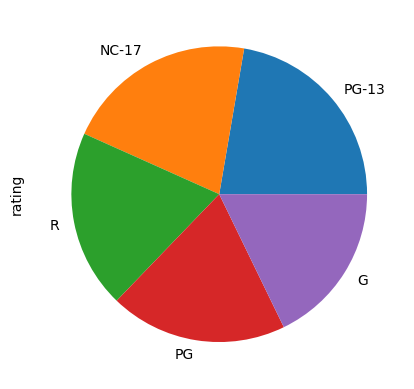

In [29]:
movies_by_rating = df_film['rating'].value_counts().plot(kind='pie')
movies_by_rating

<span style="color:blue; font-weight:bold; font-size:16px;">The ratings distributed equally.</span>


In [30]:
# Checking for Na values in the actor table
df_actor.isna().value_counts()

actor_id  first_name  last_name  last_update
False     False       False      False          200
dtype: int64

In [31]:
# Checking if data tyPes are c0rrect 
df_actor.dtypes

actor_id                int64
first_name             object
last_name              object
last_update    datetime64[ns]
dtype: object

In [32]:
df_customer

,customer_id,store_id,first_name,last_name,email,address_id,activebool,create_date,last_update,active
0,524,1,Jared,Ely,jared.ely@sakilacustomer.org,530,True,2006-02-14,2013-05-26 14:49:45.738,1
1,1,1,Mary,Smith,mary.smith@sakilacustomer.org,5,True,2006-02-14,2013-05-26 14:49:45.738,1
2,2,1,Patricia,Johnson,patricia.johnson@sakilacustomer.org,6,True,2006-02-14,2013-05-26 14:49:45.738,1
3,3,1,Linda,Williams,linda.williams@sakilacustomer.org,7,True,2006-02-14,2013-05-26 14:49:45.738,1
4,4,2,Barbara,Jones,barbara.jones@sakilacustomer.org,8,True,2006-02-14,2013-05-26 14:49:45.738,1
...,...,...,...,...,...,...,...,...,...,...
594,595,1,Terrence,Gunderson,terrence.gunderson@sakilacustomer.org,601,True,2006-02-14,2013-05-26 14:49:45.738,1
595,596,1,Enrique,Forsythe,enrique.forsythe@sakilacustomer.org,602,True,2006-02-14,2013-05-26 14:49:45.738,1
596,597,1,Freddie,Duggan,freddie.duggan@sakilacustomer.org,603,True,2006-02-14,2013-05-26 14:49:45.738,1
597,598,1,Wade,Delvalle,wade.delvalle@sakilacustomer.org,604,True,2006-02-14,2013-05-26 14:49:45.738,1


In [33]:
# Lets take a look at customer table
for column in df_customer.columns:
    print(column)
    print(df_customer[column].unique())

customer_id
[524   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 24

In [34]:
#Determine the number of customers by ids
number_of_customers = df_customer['customer_id'].count()
number_of_customers

599

In [35]:
# Checking for data types 
df_customer.dtypes

customer_id             int64
store_id                int64
first_name             object
last_name              object
email                  object
address_id              int64
activebool               bool
create_date            object
last_update    datetime64[ns]
active                  int64
dtype: object

In [36]:
#lets calculate the average rental frequency broken down by each customer
df_rental_rentaldate_customer = df_rental[['rental_date', 'customer_id']]

In [37]:
# We merge the tables
df_customer_rental = df_customer.merge(df_rental_rentaldate_customer, on='customer_id')

In [38]:
#how many times a user rented a film
customer_by_rent_frequency = df_customer_rental.pivot_table(index='customer_id', values='rental_date', aggfunc='count')

In [39]:
#how many times a user rented a film
customer_by_rent_frequency

,rental_date
customer_id,
1,32
2,27
3,26
4,22
5,38
...,...
595,30
596,28
597,25


In [40]:
# creating a separate table with customers' ids and names
df_customer_first_last_names = df_customer[['customer_id', 'first_name', 'last_name']]

In [41]:
# create a coumn with full names of customers
df_customer_first_last_names['full_name'] = df_customer_first_last_names['first_name'] + ' ' + df_customer_first_last_names['last_name']
df_customer_first_last_names

C:\Users\vblei\AppData\Local\Temp\ipykernel_13848\342202574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_first_last_names['full_name'] = df_customer_first_last_names['first_name'] + ' ' + df_customer_first_last_names['last_name']


,customer_id,first_name,last_name,full_name
0,524,Jared,Ely,Jared Ely
1,1,Mary,Smith,Mary Smith
2,2,Patricia,Johnson,Patricia Johnson
3,3,Linda,Williams,Linda Williams
4,4,Barbara,Jones,Barbara Jones
...,...,...,...,...
594,595,Terrence,Gunderson,Terrence Gunderson
595,596,Enrique,Forsythe,Enrique Forsythe
596,597,Freddie,Duggan,Freddie Duggan
597,598,Wade,Delvalle,Wade Delvalle


In [42]:
# Merging the tables with info about customers and the numbers of rents they made 
cst = df_customer_first_last_names.merge(customer_by_rent_frequency, on='customer_id')
cst['number_of_rents'] = cst['rental_date']
cst = cst.drop('rental_date', axis=1)
cst

,customer_id,first_name,last_name,full_name,number_of_rents
0,524,Jared,Ely,Jared Ely,19
1,1,Mary,Smith,Mary Smith,32
2,2,Patricia,Johnson,Patricia Johnson,27
3,3,Linda,Williams,Linda Williams,26
4,4,Barbara,Jones,Barbara Jones,22
...,...,...,...,...,...
594,595,Terrence,Gunderson,Terrence Gunderson,30
595,596,Enrique,Forsythe,Enrique Forsythe,28
596,597,Freddie,Duggan,Freddie Duggan,25
597,598,Wade,Delvalle,Wade Delvalle,22


In [43]:
# The average ammount of rents grouped by a customer
average_frequency_rate_by_customer = cst.groupby(['customer_id', 'full_name'])['number_of_rents'].mean()
average_frequency_rate_by_customer

customer_id  full_name         
1            Mary Smith            32.0
2            Patricia Johnson      27.0
3            Linda Williams        26.0
4            Barbara Jones         22.0
5            Elizabeth Brown       38.0
                                   ... 
595          Terrence Gunderson    30.0
596          Enrique Forsythe      28.0
597          Freddie Duggan        25.0
598          Wade Delvalle         22.0
599          Austin Cintron        19.0
Name: number_of_rents, Length: 599, dtype: float64

In [44]:
# make a normal dataframe by resetting index
average_frequency_rate_by_customer = average_frequency_rate_by_customer.reset_index()
average_frequency_rate_by_customer

,customer_id,full_name,number_of_rents
0,1,Mary Smith,32.0
1,2,Patricia Johnson,27.0
2,3,Linda Williams,26.0
3,4,Barbara Jones,22.0
4,5,Elizabeth Brown,38.0
...,...,...,...
594,595,Terrence Gunderson,30.0
595,596,Enrique Forsythe,28.0
596,597,Freddie Duggan,25.0
597,598,Wade Delvalle,22.0


In [45]:
# Taking a look at the address table
for column in df_address.columns:
    print(column)
    print(df_address[column].unique())

address_id
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244

<span style="color:blue; font-weight:bold; font-size:16px;">The 'phone' column seems to have invalid numbers, let us clear them. We will do so by assuming that in our case a valid number is that, that consists of 12 numbers</span>

In [46]:
# Write a function that counts the amount of numbers in the phone column
def count_character(value):
    return(len(str(value)))
# Then we make a new column giving us the number of characters in it
df_address['length_character'] = df_address['phone'].apply(count_character)

In [47]:
df_address

,address_id,address,address2,district,city_id,postal_code,phone,last_update,length_character
0,1,47 MySakila Drive,None,Alberta,300,,,2006-02-15 09:45:30,0
1,2,28 MySQL Boulevard,None,QLD,576,,,2006-02-15 09:45:30,0
2,3,23 Workhaven Lane,None,Alberta,300,,14033335568,2006-02-15 09:45:30,11
3,4,1411 Lillydale Drive,None,QLD,576,,6172235589,2006-02-15 09:45:30,10
4,5,1913 Hanoi Way,,Nagasaki,463,35200,28303384290,2006-02-15 09:45:30,11
...,...,...,...,...,...,...,...,...,...
598,601,844 Bucuresti Place,,Liaoning,242,36603,935952366111,2006-02-15 09:45:30,12
599,602,1101 Bucuresti Boulevard,,West Greece,401,97661,199514580428,2006-02-15 09:45:30,12
600,603,1103 Quilmes Boulevard,,Piura,503,52137,644021380889,2006-02-15 09:45:30,12
601,604,1331 Usak Boulevard,,Vaud,296,61960,145308717464,2006-02-15 09:45:30,12


In [48]:
# Lets write a lambda function and itterate over the dataframe and make length_character column 0 if the number isnt equal 12
lamb = lambda x: x*0 if x < 12 else x
df_address['length_character'] = df_address['length_character'].apply(lamb)

In [49]:
# We replaced the invalid numbers to '0'
df_address

,address_id,address,address2,district,city_id,postal_code,phone,last_update,length_character
0,1,47 MySakila Drive,None,Alberta,300,,,2006-02-15 09:45:30,0
1,2,28 MySQL Boulevard,None,QLD,576,,,2006-02-15 09:45:30,0
2,3,23 Workhaven Lane,None,Alberta,300,,14033335568,2006-02-15 09:45:30,0
3,4,1411 Lillydale Drive,None,QLD,576,,6172235589,2006-02-15 09:45:30,0
4,5,1913 Hanoi Way,,Nagasaki,463,35200,28303384290,2006-02-15 09:45:30,0
...,...,...,...,...,...,...,...,...,...
598,601,844 Bucuresti Place,,Liaoning,242,36603,935952366111,2006-02-15 09:45:30,12
599,602,1101 Bucuresti Boulevard,,West Greece,401,97661,199514580428,2006-02-15 09:45:30,12
600,603,1103 Quilmes Boulevard,,Piura,503,52137,644021380889,2006-02-15 09:45:30,12
601,604,1331 Usak Boulevard,,Vaud,296,61960,145308717464,2006-02-15 09:45:30,12


In [50]:
# we'll mark the 0 value instances, but won't delete them for now
df_address['length_character'].value_counts()

12    533
0      70
Name: length_character, dtype: int64

In [51]:
#Checking for Na values in address table
df_address['address'].isna().value_counts()

False    603
Name: address, dtype: int64

<h2>Let's add cities in which customers live to our general table </h2>

In [52]:
# merging cities and addresses
df_city_address = df_city.merge(df_address, on='city_id')

In [53]:
f = df_customer[['customer_id','address_id']]
f

,customer_id,address_id
0,524,530
1,1,5
2,2,6
3,3,7
4,4,8
...,...,...
594,595,601
595,596,602
596,597,603
597,598,604


In [54]:
average_frequency_rate_by_customer

,customer_id,full_name,number_of_rents
0,1,Mary Smith,32.0
1,2,Patricia Johnson,27.0
2,3,Linda Williams,26.0
3,4,Barbara Jones,22.0
4,5,Elizabeth Brown,38.0
...,...,...,...
594,595,Terrence Gunderson,30.0
595,596,Enrique Forsythe,28.0
596,597,Freddie Duggan,25.0
597,598,Wade Delvalle,22.0


In [55]:
# average_frequency_rate_by_customer['customer_id'] = average_frequency_rate_by_customer['index']

In [56]:
# Now we merge our main column with newly made column so that we can merge cities to it later
average_frequency_rate_by_customer = average_frequency_rate_by_customer.merge(f, on='customer_id')
#average_frequency_rate_by_customer['address_id'] = average_frequency_rate_by_customer['address_id']
average_frequency_rate_by_customer

,customer_id,full_name,number_of_rents,address_id
0,1,Mary Smith,32.0,5
1,2,Patricia Johnson,27.0,6
2,3,Linda Williams,26.0,7
3,4,Barbara Jones,22.0,8
4,5,Elizabeth Brown,38.0,9
...,...,...,...,...
594,595,Terrence Gunderson,30.0,601
595,596,Enrique Forsythe,28.0,602
596,597,Freddie Duggan,25.0,603
597,598,Wade Delvalle,22.0,604


In [57]:
# creating a new table with needed columns for subsuquent merging 
cities = df_city_address[['city_id','address_id', 'city']]
cities

,city_id,address_id,city
0,1,56,A Corua (La Corua)
1,2,105,Abha
2,3,457,Abu Dhabi
3,4,491,Acua
4,5,332,Adana
...,...,...,...
598,596,236,Zaria
599,597,356,Zeleznogorsk
600,598,579,Zhezqazghan
601,599,556,Zhoushan


In [58]:
average_frequency_rate_by_customer = average_frequency_rate_by_customer.merge(cities, on='address_id')
#average_frequency_rate_by_customer = average_frequency_rate_by_customer.drop('address_id_y', axis=1)
average_frequency_rate_by_customer

,customer_id,full_name,number_of_rents,address_id,city_id,city
0,1,Mary Smith,32.0,5,463,Sasebo
1,2,Patricia Johnson,27.0,6,449,San Bernardino
2,3,Linda Williams,26.0,7,38,Athenai
3,4,Barbara Jones,22.0,8,349,Myingyan
4,5,Elizabeth Brown,38.0,9,361,Nantou
...,...,...,...,...,...,...
594,595,Terrence Gunderson,30.0,601,242,Jinzhou
595,596,Enrique Forsythe,28.0,602,401,Patras
596,597,Freddie Duggan,25.0,603,503,Sullana
597,598,Wade Delvalle,22.0,604,296,Lausanne


In [59]:
#average_frequency_rate_by_customer.plot(kind='line', x='city', y='number_of_rents')

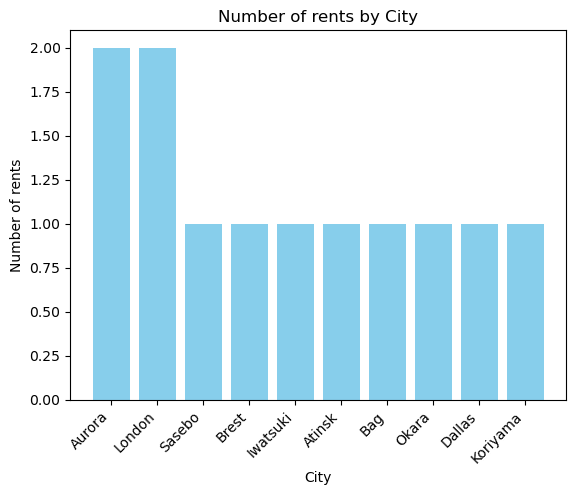

In [60]:
#Due to simplicty of acquired data, we have only 2 cities in which more than 1 customers rented a film, Therefore we will plot 10 
#cities 
city_counts = average_frequency_rate_by_customer['city'].value_counts()[:10]
# Plot a bar chart
plt.bar(city_counts.index, city_counts.values, color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of rents')
plt.title('Number of rents by City')
plt.xticks(rotation=45, ha='right')
plt.show()


In [61]:
average_frequency_rate_by_customer

,customer_id,full_name,number_of_rents,address_id,city_id,city
0,1,Mary Smith,32.0,5,463,Sasebo
1,2,Patricia Johnson,27.0,6,449,San Bernardino
2,3,Linda Williams,26.0,7,38,Athenai
3,4,Barbara Jones,22.0,8,349,Myingyan
4,5,Elizabeth Brown,38.0,9,361,Nantou
...,...,...,...,...,...,...
594,595,Terrence Gunderson,30.0,601,242,Jinzhou
595,596,Enrique Forsythe,28.0,602,401,Patras
596,597,Freddie Duggan,25.0,603,503,Sullana
597,598,Wade Delvalle,22.0,604,296,Lausanne


df_film = pd.read_sql_query(query, connect)
-df_actor = pd.read_sql_query(query2, connect)
-df_inventory = pd.read_sql_query(query3, connect)
-df_rental = pd.read_sql_query(query4, connect)
df_customer = pd.read_sql_query(query5, connect)
df_address = pd.read_sql_query(query6, connect)
df_city = pd.read_sql_query(query7, connect)

In [62]:
#searching for Na values
df_payment['amount'].isna().value_counts()

False    14596
Name: amount, dtype: int64

<AxesSubplot:>

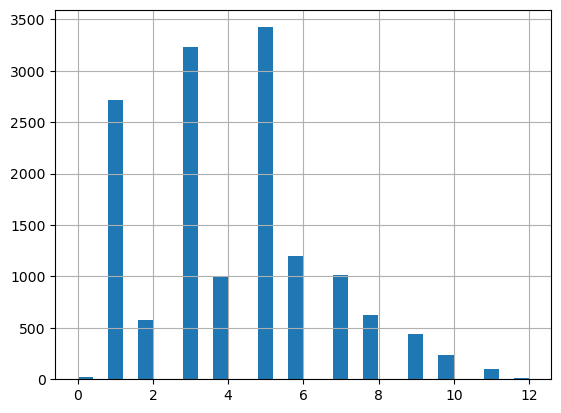

In [63]:
# taking a look at the distribution
df_payment['amount'].hist(bins=30)

In [64]:
# creating a convenient column to use for merging later
df_payment
df_payment_payment = df_payment[['customer_id', 'amount', 'payment_date']]

In [65]:
# taking a look at each column
for column in df_payment.columns:
    print(column)
    print(df_payment[column].unique())

payment_id
[17503 17504 17505 ... 32096 32097 32098]
customer_id
[341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376
 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 398 399 400 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 434 435 436 437 438 439 441 442 443 444 446 447 448 449 450 451 452
 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470
 471 472 473 474 476 477 478 479 480 481 482 483 484 485 486 487 488 489
 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507
 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525
 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543
 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561
 562 563 564 565 566 567 568 569 570 571 572 573 574 575 57

In [66]:
# merging the tables
average_frequency_rate_by_customer = average_frequency_rate_by_customer.merge(df_payment_payment, on='customer_id')
average_frequency_rate_by_customer

,customer_id,full_name,number_of_rents,address_id,city_id,city,amount,payment_date
0,1,Mary Smith,32.0,5,463,Sasebo,5.99,2007-02-14 23:22:38.996577
1,1,Mary Smith,32.0,5,463,Sasebo,0.99,2007-02-15 16:31:19.996577
2,1,Mary Smith,32.0,5,463,Sasebo,9.99,2007-02-15 19:37:12.996577
3,1,Mary Smith,32.0,5,463,Sasebo,4.99,2007-02-16 13:47:23.996577
4,1,Mary Smith,32.0,5,463,Sasebo,4.99,2007-02-18 07:10:14.996577
...,...,...,...,...,...,...,...,...
14591,599,Austin Cintron,19.0,605,537,Tieli,9.99,2007-04-12 15:32:22.996577
14592,599,Austin Cintron,19.0,605,537,Tieli,2.99,2007-04-12 19:52:25.996577
14593,599,Austin Cintron,19.0,605,537,Tieli,6.99,2007-04-30 02:21:03.996577
14594,599,Austin Cintron,19.0,605,537,Tieli,2.99,2007-04-30 03:25:33.996577


In [67]:
#grouping the values for number of rents and finding mean of it
number_of_rents_grouped = average_frequency_rate_by_customer.pivot_table(index='full_name', values='number_of_rents').sort_values(by='number_of_rents',ascending=False)

<span style='font-size: 25px; letter-spacing: 1.3px ;'> We will now count the overall spending made by each customer</span>

In [68]:

cst = cst.merge(df_payment, on='customer_id')
cst

,customer_id,first_name,last_name,full_name,number_of_rents,payment_id,staff_id,rental_id,amount,payment_date
0,524,Jared,Ely,Jared Ely,19,18202,1,1306,1.99,2007-02-15 08:27:50.996577
1,524,Jared,Ely,Jared Ely,19,18203,2,1651,4.99,2007-02-16 07:53:04.996577
2,524,Jared,Ely,Jared Ely,19,18204,2,3454,2.99,2007-02-21 19:40:39.996577
3,524,Jared,Ely,Jared Ely,19,21950,2,13626,2.99,2007-03-20 05:23:50.996577
4,524,Jared,Ely,Jared Ely,19,21951,2,14046,4.99,2007-03-20 20:21:47.996577
...,...,...,...,...,...,...,...,...,...,...
14591,599,Austin,Cintron,Austin Cintron,19,28905,2,6800,9.99,2007-04-12 15:32:22.996577
14592,599,Austin,Cintron,Austin Cintron,19,28906,2,6895,2.99,2007-04-12 19:52:25.996577
14593,599,Austin,Cintron,Austin Cintron,19,28907,1,8965,6.99,2007-04-30 02:21:03.996577
14594,599,Austin,Cintron,Austin Cintron,19,28908,2,9630,2.99,2007-04-30 03:25:33.996577


In [69]:
total_sum_payed_by_customer = cst.pivot_table(index='full_name', values='amount', aggfunc='sum').sort_values(by='amount', ascending=False)
total_sum_payed_by_customer= total_sum_payed_by_customer.reset_index()

In [70]:
top_10 = total_sum_payed_by_customer['full_name'].value_counts()[:10]
top_10 = top_10.index
top_10_mean = (total_sum_payed_by_customer
               .query('full_name in @top_10')
               .pivot_table(index='full_name', values='amount', aggfunc='mean')
               .sort_values('amount', ascending=False)      
)
top_10_mean

,amount
full_name,
Eleanor Hunt,211.55
Hugh Waldrop,89.80
Andrew Purdy,89.78
Benjamin Varney,89.78
Beverly Brooks,89.78
Bertha Ferguson,89.77
Edgar Rhoads,89.77
Jackie Lynch,89.77
Judy Gray,89.77


<AxesSubplot:xlabel='full_name'>

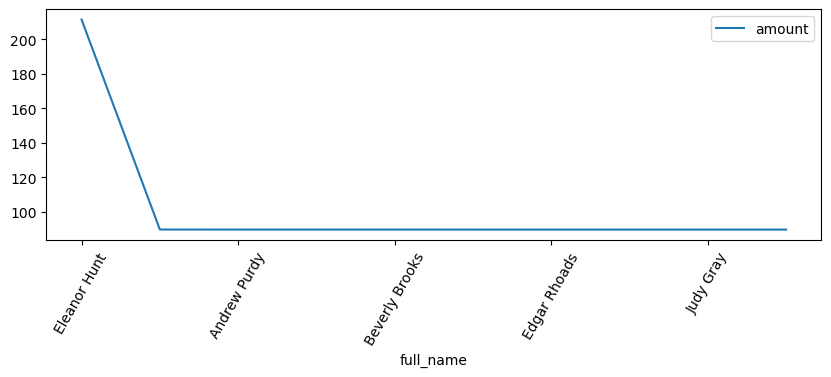

In [71]:
# Due to our data being somewhat articial we get very similar numbers for each customer, that is why graph looks so flat
top_10_mean.plot(kind='line', rot=60, figsize=(10,3))

<AxesSubplot:ylabel='amount'>

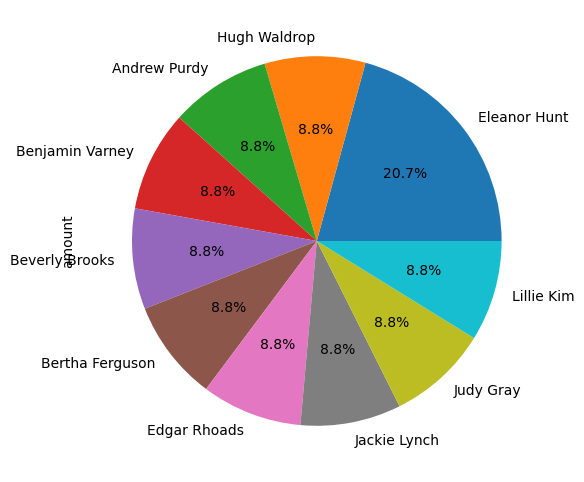

In [72]:
# pie graph of distribution of customers' spendings
top_10_mean.plot(kind='pie', y='amount', autopct='%1.1f%%', figsize=(10,6), labeldistance=1.1, legend=False)

In [73]:
top_10_mean

,amount
full_name,
Eleanor Hunt,211.55
Hugh Waldrop,89.80
Andrew Purdy,89.78
Benjamin Varney,89.78
Beverly Brooks,89.78
Bertha Ferguson,89.77
Edgar Rhoads,89.77
Jackie Lynch,89.77
Judy Gray,89.77


In [74]:
# back to our previous column
average_frequency_rate_by_customer['payment_date'].value_counts()

2007-05-14 13:44:29.996577    182
2007-03-01 18:51:17.996577      2
2007-04-30 13:53:45.996577      2
2007-03-17 06:09:21.996577      2
2007-03-19 05:35:17.996577      2
                             ... 
2007-04-09 13:43:28.996577      1
2007-04-10 18:38:00.996577      1
2007-04-30 05:53:21.996577      1
2007-03-02 00:27:02.996577      1
2007-04-30 05:09:45.996577      1
Name: payment_date, Length: 14365, dtype: int64

<span style='font-size: 19px;'>We will check if there exists any correlation between number of rented films and payment date or amount spent, or any correlation between the latter two </span>

In [75]:
cor = average_frequency_rate_by_customer['number_of_rents'].corr(average_frequency_rate_by_customer['payment_date'].view('int64'))
cor

0.006566797458095861

In [76]:
cor2 = average_frequency_rate_by_customer['number_of_rents'].corr(average_frequency_rate_by_customer['amount'].view('int64'))
cor2

-0.015535590719584188

In [77]:
cor3 = average_frequency_rate_by_customer['amount'].corr(average_frequency_rate_by_customer['payment_date'].view('int64'))
cor3

-0.0023021254372258965

In [78]:
import seaborn as sns
# Changing the data type of 'number of rents' column to numeric to use it in building graphs later
average_frequency_rate_by_customer['number_of_rents'].replace('Patricia', pd.NA, inplace=True)
average_frequency_rate_by_customer['number_of_rents'] = pd.to_numeric(average_frequency_rate_by_customer['number_of_rents'], errors='coerce', downcast='float')
average_frequency_rate_by_customer['number_of_rents'].isna().value_counts()

False    14596
Name: number_of_rents, dtype: int64

In [79]:
average_frequency_rate_by_customer

,customer_id,full_name,number_of_rents,address_id,city_id,city,amount,payment_date
0,1,Mary Smith,32.0,5,463,Sasebo,5.99,2007-02-14 23:22:38.996577
1,1,Mary Smith,32.0,5,463,Sasebo,0.99,2007-02-15 16:31:19.996577
2,1,Mary Smith,32.0,5,463,Sasebo,9.99,2007-02-15 19:37:12.996577
3,1,Mary Smith,32.0,5,463,Sasebo,4.99,2007-02-16 13:47:23.996577
4,1,Mary Smith,32.0,5,463,Sasebo,4.99,2007-02-18 07:10:14.996577
...,...,...,...,...,...,...,...,...
14591,599,Austin Cintron,19.0,605,537,Tieli,9.99,2007-04-12 15:32:22.996577
14592,599,Austin Cintron,19.0,605,537,Tieli,2.99,2007-04-12 19:52:25.996577
14593,599,Austin Cintron,19.0,605,537,Tieli,6.99,2007-04-30 02:21:03.996577
14594,599,Austin Cintron,19.0,605,537,Tieli,2.99,2007-04-30 03:25:33.996577


<span style='font-size: 25px;'>Let us see in which cities our customers reside and visualise the 12 cities with most proportion of customers in them (exceed 6 percent) </span>

In [80]:
all_customers = len(average_frequency_rate_by_customer['customer_id'].value_counts())
df_for_barh = average_frequency_rate_by_customer.groupby('city').size()/all_customers
df_for_barh_filtered = df_for_barh[df_for_barh>0.060]
df_for_barh_filtered.count()

12

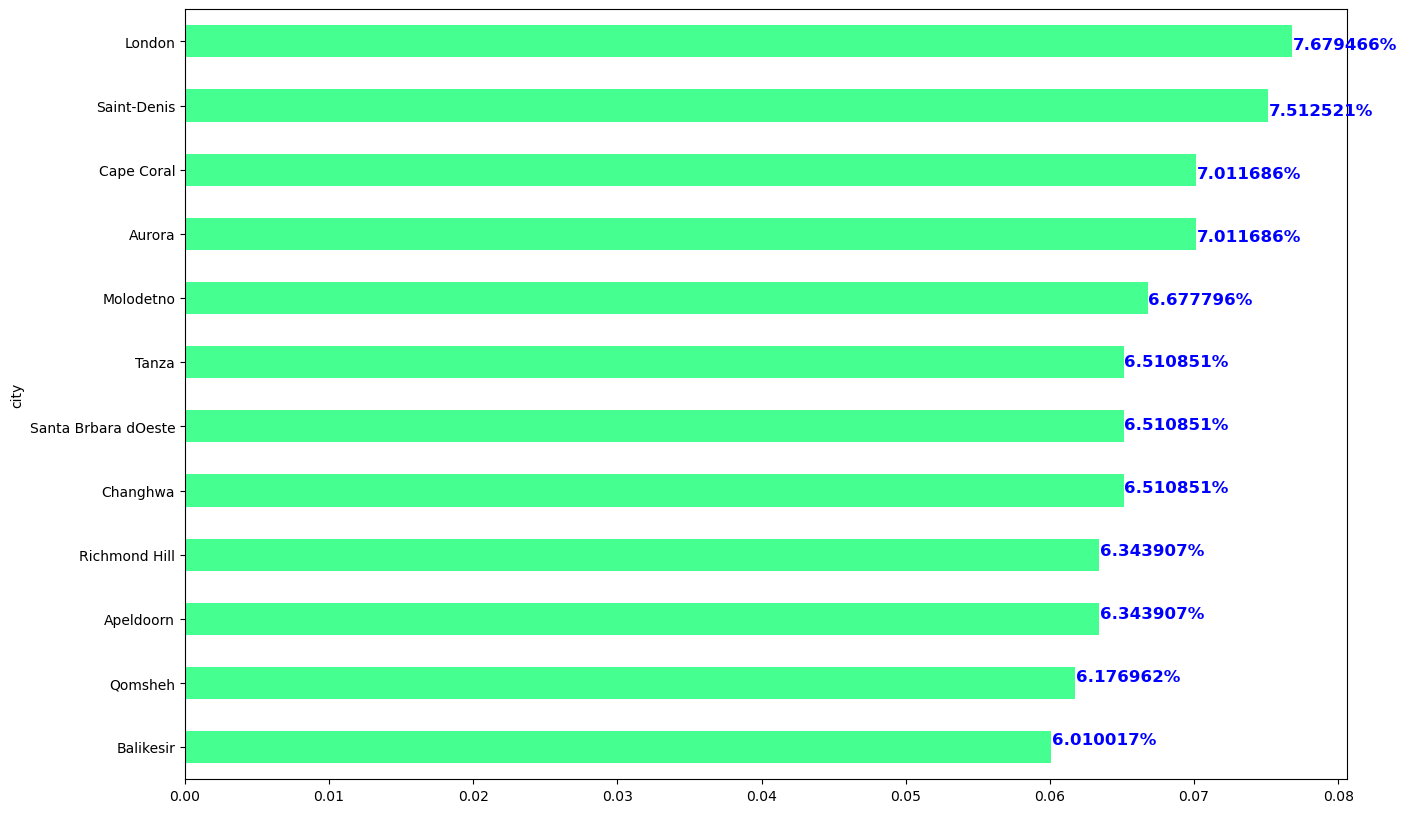

In [81]:

df_for_barh = average_frequency_rate_by_customer.groupby('city').size()/all_customers
df_for_barh_filtered = df_for_barh[df_for_barh>0.060].sort_values()
ax = df_for_barh_filtered.plot(kind='barh', color = '#45ff91', figsize=(15,10))

labels = dict(df_for_barh_filtered)
labels 
i = 0
for city in labels:
    ax.text(labels[city] + 0.00005, i + 0.05, str(round(labels[city]*100, 6)) + '%',
            fontsize='large',fontweight='bold', color='blue')
    if i < 9.7:
        i += 0.98
    else:
        i += 1.02

In [82]:
# checking data types
average_frequency_rate_by_customer.dtypes

customer_id                 int64
full_name                  object
number_of_rents           float32
address_id                  int64
city_id                     int64
city                       object
amount                    float64
payment_date       datetime64[ns]
dtype: object

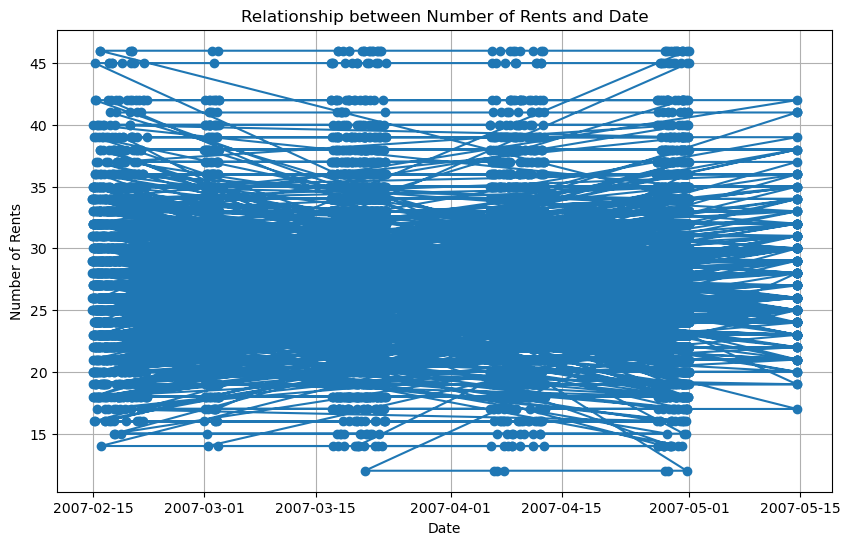

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(average_frequency_rate_by_customer['payment_date'], average_frequency_rate_by_customer['number_of_rents'], marker='o', linestyle='-')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Number of Rents')
plt.title('Relationship between Number of Rents and Date')

# display the plot
plt.grid(True)
plt.show()

In [84]:
# creating a back-up DataFrame in case of unresetable changes in the following graph creation
df_test = average_frequency_rate_by_customer.copy()

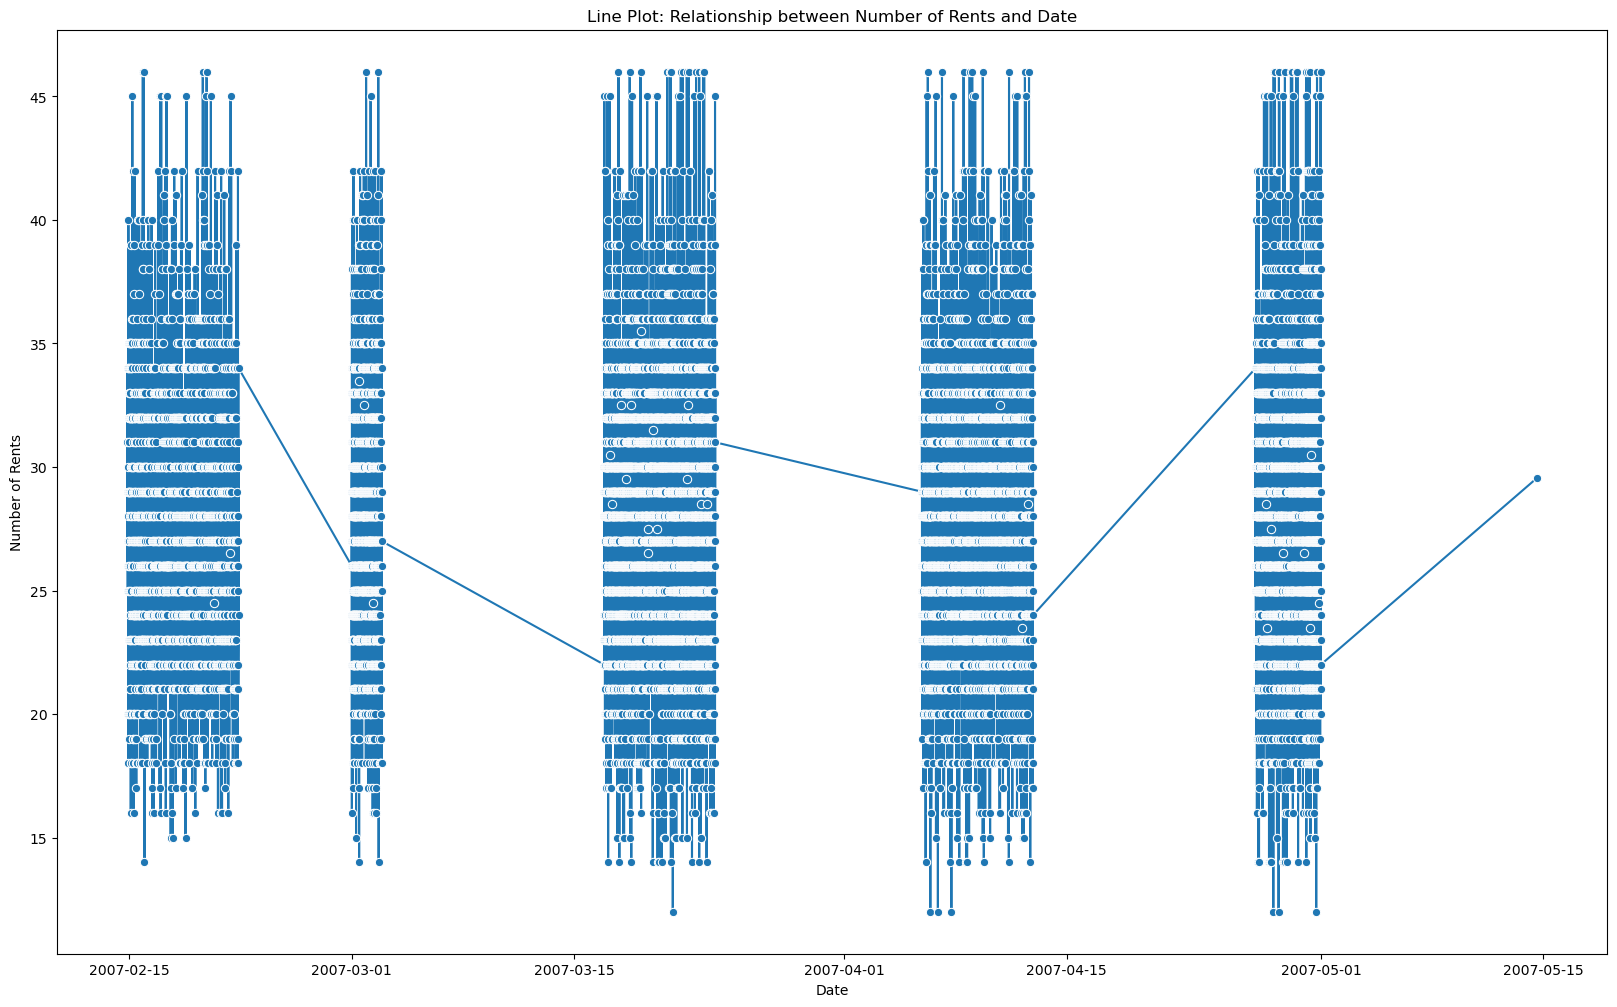

In [85]:
# Creating a graph of relationship between number of rents and date
import seaborn as sns
df_test = df_test.groupby(['payment_date', 'number_of_rents']).size().reset_index(name='Count')  # Mean() can also be used if number of rents = numeric value


df_downsampled = df_test.groupby('payment_date')['number_of_rents'].mean().reset_index()

# creating plot
plt.figure(figsize=(20, 12))
sns.lineplot(x='payment_date', y='number_of_rents', data=df_downsampled, marker='o')

# creating labels
plt.xlabel('Date')
plt.ylabel('Number of Rents')
plt.title('Line Plot: Relationship between Number of Rents and Date')

# showing the plot
plt.show()



<h1> Interpretation: </h1>
<h3> <ul><li> The density of the bar (y-axis) indicates a visual difference between number of rents made on a given date (x-axis) </li>
     <li> The line indicates the movements (increase or decrease) of a mean value in number of rents
    </li><ul></h3>
 <span style='font-size:21px; font-color:Blue;'>we can see the mean decreases for 3 months and start to increase on the last two weeks</span>
    


<h1>The final step is to prepare created main DataFrame for exporing to TableAU</h1>

In [81]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import us


<H2> <span style='letter-spacing: 1.2px;'>In this dataFrame, many cities are spelled incorectly , therefore we will try to replace the wrong names with the correct ones, using a different dataFrame called 'worldcities.csv'. Let us now try now to write a function that will determine if the city is real by name  </span></H2>

In [82]:
df_world_cities = pd.read_csv('worldcities.csv')
df_world_cities

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
44686,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
44687,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,NaN,NaN,10.0,1304217709
44688,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
44689,San Rafael,San Rafael,-16.7795,-60.6799,Bolivia,BO,BOL,Santa Cruz,NaN,NaN,1068007388


In [86]:

def is_city_real(city_name, df_cities):
    #Converting the city name to title case for consistency
    city_name = city_name.title()

    #Checking if the city name is in the list of valid cities
    return city_name in df_cities['city'].values

average_frequency_rate_by_customer

,customer_id,full_name,number_of_rents,address_id,city_id,city,amount,payment_date,is_real_city
0,1,Mary Smith,32.0,5,463,Sasebo,5.99,2007-02-14 23:22:38.996577,1
1,1,Mary Smith,32.0,5,463,Sasebo,0.99,2007-02-15 16:31:19.996577,1
2,1,Mary Smith,32.0,5,463,Sasebo,9.99,2007-02-15 19:37:12.996577,1
3,1,Mary Smith,32.0,5,463,Sasebo,4.99,2007-02-16 13:47:23.996577,1
4,1,Mary Smith,32.0,5,463,Sasebo,4.99,2007-02-18 07:10:14.996577,1
...,...,...,...,...,...,...,...,...,...
14591,599,Austin Cintron,19.0,605,537,Tieli,9.99,2007-04-12 15:32:22.996577,1
14592,599,Austin Cintron,19.0,605,537,Tieli,2.99,2007-04-12 19:52:25.996577,1
14593,599,Austin Cintron,19.0,605,537,Tieli,6.99,2007-04-30 02:21:03.996577,1
14594,599,Austin Cintron,19.0,605,537,Tieli,2.99,2007-04-30 03:25:33.996577,1


In [84]:
#Check if the function works properly
for index, row in average_frequency_rate_by_customer.iterrows():
    city = row['city']
    if is_city_real(city, df_world_cities):
        print(f'{city} is a real city')
    else:
        print(f'{city} is not a valid city')



Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
San Bernardino is a real city
San Bernardino is a real city
San Bernardino is a real city
San Bernardino is a real city
San Bernardino is a real city
San Bernardino is a real city
San Bernardino is a real city
San Bernardino is a real city
San Bernardino is a real city
San Bernardino is a real city
San Bernardino is a real city
San Bernar

Sal is not a valid city
Sal is not a valid city
Sal is not a valid city
Sal is not a valid city
Sal is not a valid city
Sal is not a valid city
Sal is not a valid city
Sal is not a valid city
Sal is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Crdoba is not a valid city
C

Antofagasta is a real city
Antofagasta is a real city
Antofagasta is a real city
Antofagasta is a real city
Antofagasta is a real city
Antofagasta is a real city
Antofagasta is a real city
Antofagasta is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Moscow is a real city
Juazeiro do Norte is not a valid city
Juazeiro do Norte is not a valid city
Juazeiro do Norte is not a

Baybay is a real city
Baybay is a real city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Taguig is not a valid city
Chiayi is a real city
Chiayi is a real city
Chiayi is a real city
Chiayi is a real city
Chiayi is a real city
Chiayi is a real city
Chiayi is a real city
Chiayi is a real city
Chiayi is a real city
Chiayi is a real city
Chiayi 

Kimchon is not a valid city
Kimchon is not a valid city
Kimchon is not a valid city
Kimchon is not a valid city
Kimchon is not a valid city
Kimchon is not a valid city
Kimchon is not a valid city
Kimchon is not a valid city
Kimchon is not a valid city
Kimchon is not a valid city
Kimchon is not a valid city
Kimchon is not a valid city
Kimchon is not a valid city
Kimchon is not a valid city
Kimchon is not a valid city
Kimchon is not a valid city
Kimchon is not a valid city
Jelets is not a valid city
Jelets is not a valid city
Jelets is not a valid city
Jelets is not a valid city
Jelets is not a valid city
Jelets is not a valid city
Jelets is not a valid city
Jelets is not a valid city
Jelets is not a valid city
Jelets is not a valid city
Jelets is not a valid city
Jelets is not a valid city
Jelets is not a valid city
Jelets is not a valid city
Jelets is not a valid city
Jelets is not a valid city
Jelets is not a valid city
Jelets is not a valid city
Jelets is not a valid city
Jelets is n

Ktahya is not a valid city
Ktahya is not a valid city
Ktahya is not a valid city
Ktahya is not a valid city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Boksburg is a real city
Po is not a valid city
Po is not a valid city
Po is not a valid city
Po is not a valid city
Po is not a valid city
Po is not a valid city
Po is not 

Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Jinchang is a real city
Pingxiang is a real city
Pingxiang is a real city
Pingxiang is a real city
Pingxiang is a real city
Pingxiang is a real city
Pingxiang is a real city
Pingxiang is a real city
Pingxiang is a real city
Pingxiang is a real city
Pingxia

Mandaluyong is not a valid city
Mandaluyong is not a valid city
Mandaluyong is not a valid city
Mandaluyong is not a valid city
Mandaluyong is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Higashiosaka is not a valid city
Olomouc is a re

Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Ahmadnagar is a real city
Ahmadnagar is a real city
Ahmadnagar is a real city
Ahmadnagar is a real city
Ahmadnagar is a real city
Ahmadnagar is a real city
Ahmadnagar is a real city
Ahmadnagar is a real city
Ahmadnagar is a real city
Ahmadnagar is a real city
Ahmadnagar is a real city
Ahmadnagar is a real city
Ahmadnagar is a real city
Ahmadnagar is a real city
Ahmadnagar is a real city
Ahmadnagar is a real city
Ahmadnagar is a real city
Ahmadnagar is a real city
Ahmadnagar is a real city
Ahmadnagar is a real city
Ahmadnagar is a real city
Ahmadn

Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou i

Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a valid city
Hsichuh is not a

Tama is a real city
Tama is a real city
Tama is a real city
Tama is a real city
Tama is a real city
Tama is a real city
Kamjanets-Podilskyi is not a valid city
Kamjanets-Podilskyi is not a valid city
Kamjanets-Podilskyi is not a valid city
Kamjanets-Podilskyi is not a valid city
Kamjanets-Podilskyi is not a valid city
Kamjanets-Podilskyi is not a valid city
Kamjanets-Podilskyi is not a valid city
Kamjanets-Podilskyi is not a valid city
Kamjanets-Podilskyi is not a valid city
Kamjanets-Podilskyi is not a valid city
Kamjanets-Podilskyi is not a valid city
Kamjanets-Podilskyi is not a valid city
Kamjanets-Podilskyi is not a valid city
Kamjanets-Podilskyi is not a valid city
Kamjanets-Podilskyi is not a valid city
Kamjanets-Podilskyi is not a valid city
Kamjanets-Podilskyi is not a valid city
Kamjanets-Podilskyi is not a valid city
Kamjanets-Podilskyi is not a valid city
Kamjanets-Podilskyi is not a valid city
Kamjanets-Podilskyi is not a valid city
Kamjanets-Podilskyi is not a valid city


Charlotte Amalie is a real city
Charlotte Amalie is a real city
Charlotte Amalie is a real city
Charlotte Amalie is a real city
Charlotte Amalie is a real city
Charlotte Amalie is a real city
Charlotte Amalie is a real city
Charlotte Amalie is a real city
Charlotte Amalie is a real city
Charlotte Amalie is a real city
Charlotte Amalie is a real city
Charlotte Amalie is a real city
Charlotte Amalie is a real city
Charlotte Amalie is a real city
Charlotte Amalie is a real city
Charlotte Amalie is a real city
Charlotte Amalie is a real city
Charlotte Amalie is a real city
Charlotte Amalie is a real city
Charlotte Amalie is a real city
Charlotte Amalie is a real city
Charlotte Amalie is a real city
Charlotte Amalie is a real city
Charlotte Amalie is a real city
Rustenburg is a real city
Rustenburg is a real city
Rustenburg is a real city
Rustenburg is a real city
Rustenburg is a real city
Rustenburg is a real city
Rustenburg is a real city
Rustenburg is a real city
Rustenburg is a real cit

Guaruj is not a valid city
Guaruj is not a valid city
Guaruj is not a valid city
Guaruj is not a valid city
Guaruj is not a valid city
Guaruj is not a valid city
Guaruj is not a valid city
Guaruj is not a valid city
Guaruj is not a valid city
Guaruj is not a valid city
Guaruj is not a valid city
Guaruj is not a valid city
Guaruj is not a valid city
Guaruj is not a valid city
Guaruj is not a valid city
Guaruj is not a valid city
Guaruj is not a valid city
Guaruj is not a valid city
Guaruj is not a valid city
Guaruj is not a valid city
Syktyvkar is a real city
Syktyvkar is a real city
Syktyvkar is a real city
Syktyvkar is a real city
Syktyvkar is a real city
Syktyvkar is a real city
Syktyvkar is a real city
Syktyvkar is a real city
Syktyvkar is a real city
Syktyvkar is a real city
Syktyvkar is a real city
Syktyvkar is a real city
Syktyvkar is a real city
Syktyvkar is a real city
Syktyvkar is a real city
Syktyvkar is a real city
Syktyvkar is a real city
Syktyvkar is a real city
Syktyvkar 

Uluberia is not a valid city
Uluberia is not a valid city
Uluberia is not a valid city
Uluberia is not a valid city
Uluberia is not a valid city
Uluberia is not a valid city
Uluberia is not a valid city
Uluberia is not a valid city
Uluberia is not a valid city
Uluberia is not a valid city
Uluberia is not a valid city
Uluberia is not a valid city
Uluberia is not a valid city
Uluberia is not a valid city
Uluberia is not a valid city
Uluberia is not a valid city
Uluberia is not a valid city
Uluberia is not a valid city
Uluberia is not a valid city
Nabereznyje Telny is not a valid city
Nabereznyje Telny is not a valid city
Nabereznyje Telny is not a valid city
Nabereznyje Telny is not a valid city
Nabereznyje Telny is not a valid city
Nabereznyje Telny is not a valid city
Nabereznyje Telny is not a valid city
Nabereznyje Telny is not a valid city
Nabereznyje Telny is not a valid city
Nabereznyje Telny is not a valid city
Nabereznyje Telny is not a valid city
Nabereznyje Telny is not a vali

Garland is a real city
Garland is a real city
Garland is a real city
Garland is a real city
Garland is a real city
Garland is a real city
Garland is a real city
Garland is a real city
Garland is a real city
Sokoto is a real city
Sokoto is a real city
Sokoto is a real city
Sokoto is a real city
Sokoto is a real city
Sokoto is a real city
Sokoto is a real city
Sokoto is a real city
Sokoto is a real city
Sokoto is a real city
Sokoto is a real city
Sokoto is a real city
Sokoto is a real city
Sokoto is a real city
Sokoto is a real city
Sokoto is a real city
Sokoto is a real city
Sokoto is a real city
Sokoto is a real city
Sokoto is a real city
Sokoto is a real city
Sokoto is a real city
Bucuresti is not a valid city
Bucuresti is not a valid city
Bucuresti is not a valid city
Bucuresti is not a valid city
Bucuresti is not a valid city
Bucuresti is not a valid city
Bucuresti is not a valid city
Bucuresti is not a valid city
Bucuresti is not a valid city
Bucuresti is not a valid city
Bucuresti

Loja is a real city
Loja is a real city
Loja is a real city
Loja is a real city
Loja is a real city
Loja is a real city
Loja is a real city
Loja is a real city
al-Manama is not a valid city
al-Manama is not a valid city
al-Manama is not a valid city
al-Manama is not a valid city
al-Manama is not a valid city
al-Manama is not a valid city
al-Manama is not a valid city
al-Manama is not a valid city
al-Manama is not a valid city
al-Manama is not a valid city
al-Manama is not a valid city
al-Manama is not a valid city
al-Manama is not a valid city
al-Manama is not a valid city
al-Manama is not a valid city
al-Manama is not a valid city
al-Manama is not a valid city
al-Manama is not a valid city
al-Manama is not a valid city
al-Manama is not a valid city
al-Manama is not a valid city
al-Manama is not a valid city
al-Manama is not a valid city
al-Manama is not a valid city
Juiz de Fora is not a valid city
Juiz de Fora is not a valid city
Juiz de Fora is not a valid city
Juiz de Fora is not a

In [85]:
#Applying the function and creating a new column
average_frequency_rate_by_customer['is_real_city'] = average_frequency_rate_by_customer['city'].apply(lambda x: 1 if is_city_real(x, df_world_cities) else 0)
average_frequency_rate_by_customer


,customer_id,full_name,number_of_rents,address_id,city_id,city,amount,payment_date,is_real_city
0,1,Mary Smith,32.0,5,463,Sasebo,5.99,2007-02-14 23:22:38.996577,1
1,1,Mary Smith,32.0,5,463,Sasebo,0.99,2007-02-15 16:31:19.996577,1
2,1,Mary Smith,32.0,5,463,Sasebo,9.99,2007-02-15 19:37:12.996577,1
3,1,Mary Smith,32.0,5,463,Sasebo,4.99,2007-02-16 13:47:23.996577,1
4,1,Mary Smith,32.0,5,463,Sasebo,4.99,2007-02-18 07:10:14.996577,1
...,...,...,...,...,...,...,...,...,...
14591,599,Austin Cintron,19.0,605,537,Tieli,9.99,2007-04-12 15:32:22.996577,1
14592,599,Austin Cintron,19.0,605,537,Tieli,2.99,2007-04-12 19:52:25.996577,1
14593,599,Austin Cintron,19.0,605,537,Tieli,6.99,2007-04-30 02:21:03.996577,1
14594,599,Austin Cintron,19.0,605,537,Tieli,2.99,2007-04-30 03:25:33.996577,1


In [92]:
# Counting the number of valied and non-valid city names
average_frequency_rate_by_customer['is_real_city'].value_counts()

1    8525
0    6071
Name: is_real_city, dtype: int64

In [93]:
average_frequency_rate_by_customer[average_frequency_rate_by_customer['is_real_city'] == 0].groupby('city').size()

city
A Corua (La Corua)     28
Abha                   23
Acua                   23
Addis Abeba            23
Adoni                  20
                       ..
al-Qadarif             19
al-Qatif               22
guas Lindas de Gois    22
ostka                  22
s-Hertogenbosch        20
Length: 249, dtype: int64

<H2> <span style='letter-spacing: 1.2px;'>It seems like a lot of cities are indeed incorrect, let us try to replace them with correct values </span></H2>

In [94]:
df_world_cities

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
44686,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
44687,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,NaN,NaN,10.0,1304217709
44688,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
44689,San Rafael,San Rafael,-16.7795,-60.6799,Bolivia,BO,BOL,Santa Cruz,NaN,NaN,1068007388


In [95]:
# A function that corrects city names
def correct_city(row, df_correct):
    city = row['city']
    
    if row['is_real_city'] == 1:
        correct_city = df_world_cities[df_world_cities['city'] == city]['city'].values[0]
        return correct_city
    else:
        return city

# Creating a new column with corrected cities
average_frequency_rate_by_customer['corrected_city'] = average_frequency_rate_by_customer.apply(lambda row: correct_city(row, df_world_cities), axis=1)

average_frequency_rate_by_customer['city'] = average_frequency_rate_by_customer['corrected_city']

average_frequency_rate_by_customer

,customer_id,full_name,number_of_rents,address_id,city_id,city,amount,payment_date,is_real_city,corrected_city
0,1,Mary Smith,32.0,5,463,Sasebo,5.99,2007-02-14 23:22:38.996577,1,Sasebo
1,1,Mary Smith,32.0,5,463,Sasebo,0.99,2007-02-15 16:31:19.996577,1,Sasebo
2,1,Mary Smith,32.0,5,463,Sasebo,9.99,2007-02-15 19:37:12.996577,1,Sasebo
3,1,Mary Smith,32.0,5,463,Sasebo,4.99,2007-02-16 13:47:23.996577,1,Sasebo
4,1,Mary Smith,32.0,5,463,Sasebo,4.99,2007-02-18 07:10:14.996577,1,Sasebo
...,...,...,...,...,...,...,...,...,...,...
14591,599,Austin Cintron,19.0,605,537,Tieli,9.99,2007-04-12 15:32:22.996577,1,Tieli
14592,599,Austin Cintron,19.0,605,537,Tieli,2.99,2007-04-12 19:52:25.996577,1,Tieli
14593,599,Austin Cintron,19.0,605,537,Tieli,6.99,2007-04-30 02:21:03.996577,1,Tieli
14594,599,Austin Cintron,19.0,605,537,Tieli,2.99,2007-04-30 03:25:33.996577,1,Tieli


In [88]:

def correct_city(row, df_correct):
    city = row['city']

    if row['is_real_city'] == 0:
        matching_rows = df_correct[df_correct['city'] == city]
        # If the variable has a value city names is replaced 
        if not matching_rows.empty:
            correct_city = matching_rows['city'].values[0]
            return correct_city
        else:
            # If no matching rows found, return the original city
            return city
    else:
        return city

# Assuming df_world_cities is your DataFrame with correctly spelled cities
average_frequency_rate_by_customer['corrected_city'] = average_frequency_rate_by_customer.apply(lambda row: correct_city(row, df_world_cities), axis=1)

# Replace the original 'city' column with the corrected values
average_frequency_rate_by_customer['city'] = average_frequency_rate_by_customer['corrected_city']

# Drop the additional column if no longer needed
average_frequency_rate_by_customer.drop(columns=['corrected_city'], inplace=True)

average_frequency_rate_by_customer


,customer_id,full_name,number_of_rents,address_id,city_id,city,amount,payment_date,is_real_city
0,1,Mary Smith,32.0,5,463,Sasebo,5.99,2007-02-14 23:22:38.996577,1
1,1,Mary Smith,32.0,5,463,Sasebo,0.99,2007-02-15 16:31:19.996577,1
2,1,Mary Smith,32.0,5,463,Sasebo,9.99,2007-02-15 19:37:12.996577,1
3,1,Mary Smith,32.0,5,463,Sasebo,4.99,2007-02-16 13:47:23.996577,1
4,1,Mary Smith,32.0,5,463,Sasebo,4.99,2007-02-18 07:10:14.996577,1
...,...,...,...,...,...,...,...,...,...
14591,599,Austin Cintron,19.0,605,537,Tieli,9.99,2007-04-12 15:32:22.996577,1
14592,599,Austin Cintron,19.0,605,537,Tieli,2.99,2007-04-12 19:52:25.996577,1
14593,599,Austin Cintron,19.0,605,537,Tieli,6.99,2007-04-30 02:21:03.996577,1
14594,599,Austin Cintron,19.0,605,537,Tieli,2.99,2007-04-30 03:25:33.996577,1


In [96]:
average_frequency_rate_by_customer['is_real_city'].value_counts()

1    9483
0    5113
Name: is_real_city, dtype: int64

<span style='font-size:20px; color:blue'>Seems like our functions replaced only about 650 cities, which is not enough, but a deeper analysis in needed</span>

In [91]:
average_frequency_rate_by_customer

,customer_id,full_name,number_of_rents,address_id,city_id,city,amount,payment_date,is_real_city
0,1,Mary Smith,32.0,5,463,Sasebo,5.99,2007-02-14 23:22:38.996577,1
1,1,Mary Smith,32.0,5,463,Sasebo,0.99,2007-02-15 16:31:19.996577,1
2,1,Mary Smith,32.0,5,463,Sasebo,9.99,2007-02-15 19:37:12.996577,1
3,1,Mary Smith,32.0,5,463,Sasebo,4.99,2007-02-16 13:47:23.996577,1
4,1,Mary Smith,32.0,5,463,Sasebo,4.99,2007-02-18 07:10:14.996577,1
...,...,...,...,...,...,...,...,...,...
14591,599,Austin Cintron,19.0,605,537,Tieli,9.99,2007-04-12 15:32:22.996577,1
14592,599,Austin Cintron,19.0,605,537,Tieli,2.99,2007-04-12 19:52:25.996577,1
14593,599,Austin Cintron,19.0,605,537,Tieli,6.99,2007-04-30 02:21:03.996577,1
14594,599,Austin Cintron,19.0,605,537,Tieli,2.99,2007-04-30 03:25:33.996577,1


In [92]:
#Dropping the unnecesary columns and checking again
#average_frequency_rate_by_customer.drop(columns=['corrected_city', 'is_real_city'], inplace=True)


In [93]:
for index, row in average_frequency_rate_by_customer.iterrows():
    city = row['city']
    if is_city_real(city, df_world_cities):
        print(f'{city} is a real city')
    else:
        print(f'{city} is not a valid city')

Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
Sasebo is a real city
San Bernardino is a real city
San Bernardino is a real city
San Bernardino is a real city
San Bernardino is a real city
San Bernardino is a real city
San Bernardino is a real city
San Bernardino is a real city
San Bernardino is a real city
San Bernardino is a real city
San Bernardino is a real city
San Bernardino is a real city
San Bernar

Sal is not a valid city
Sal is not a valid city
Sal is not a valid city
Sal is not a valid city
Sal is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Liepaja is not a valid city
Crdoba is not a valid city
Crdoba is not a valid city
Crdoba is not a valid city
Crdoba is not a valid city
Crdoba is not a 

Yerevan is a real city
Yerevan is a real city
Yerevan is a real city
Yerevan is a real city
Yerevan is a real city
Yerevan is a real city
Yerevan is a real city
Yerevan is a real city
Yerevan is a real city
Yerevan is a real city
Yerevan is a real city
Yerevan is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Pak Kret is a real city
Faaa is not a valid city
Faa

Cayenne is a real city
Cayenne is a real city
Cayenne is a real city
Cayenne is a real city
Cayenne is a real city
Cayenne is a real city
Cayenne is a real city
Cayenne is a real city
Cayenne is a real city
Cayenne is a real city
Cayenne is a real city
Cayenne is a real city
Cayenne is a real city
Cayenne is a real city
Cayenne is a real city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm is not a valid city
Malm 

Songkhla is a real city
Songkhla is a real city
Songkhla is a real city
Songkhla is a real city
Songkhla is a real city
Songkhla is a real city
Songkhla is a real city
Songkhla is a real city
Songkhla is a real city
Songkhla is a real city
Songkhla is a real city
Songkhla is a real city
Songkhla is a real city
Songkhla is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a real city
Sincelejo is a

Klerksdorp is a real city
Klerksdorp is a real city
Klerksdorp is a real city
Klerksdorp is a real city
Klerksdorp is a real city
Klerksdorp is a real city
Klerksdorp is a real city
Klerksdorp is a real city
Klerksdorp is a real city
Klerksdorp is a real city
Klerksdorp is a real city
Klerksdorp is a real city
Klerksdorp is a real city
Klerksdorp is a real city
Klerksdorp is a real city
Klerksdorp is a real city
Klerksdorp is a real city
Klerksdorp is a real city
Klerksdorp is a real city
Enshi is not a valid city
Enshi is not a valid city
Enshi is not a valid city
Enshi is not a valid city
Enshi is not a valid city
Enshi is not a valid city
Enshi is not a valid city
Enshi is not a valid city
Enshi is not a valid city
Enshi is not a valid city
Enshi is not a valid city
Enshi is not a valid city
Caracas is a real city
Caracas is a real city
Caracas is a real city
Caracas is a real city
Caracas is a real city
Caracas is a real city
Caracas is a real city
Caracas is a real city
Caracas is

Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Botshabelo is not a valid city
Torren is not a valid city
Torren is not a valid city
Torren is not a valid city
Torren is not a valid city
Torren is not a valid city
Torren is not a valid city
Torren is not a valid city
Torre

Balurghat is not a valid city
Balurghat is not a valid city
Balurghat is not a valid city
Balurghat is not a valid city
Balurghat is not a valid city
Balurghat is not a valid city
Balurghat is not a valid city
Balurghat is not a valid city
Balurghat is not a valid city
Balurghat is not a valid city
Balurghat is not a valid city
Balurghat is not a valid city
Balurghat is not a valid city
Balurghat is not a valid city
Balurghat is not a valid city
Balurghat is not a valid city
Balurghat is not a valid city
Balurghat is not a valid city
Bhilwara is not a valid city
Bhilwara is not a valid city
Bhilwara is not a valid city
Bhilwara is not a valid city
Bhilwara is not a valid city
Bhilwara is not a valid city
Bhilwara is not a valid city
Bhilwara is not a valid city
Bhilwara is not a valid city
Bhilwara is not a valid city
Bhilwara is not a valid city
Bhilwara is not a valid city
Bhilwara is not a valid city
Bhilwara is not a valid city
Bhilwara is not a valid city
Bhilwara is not a valid c

Palghat (Palakkad) is not a valid city
Palghat (Palakkad) is not a valid city
Palghat (Palakkad) is not a valid city
Palghat (Palakkad) is not a valid city
Salinas is a real city
Salinas is a real city
Salinas is a real city
Salinas is a real city
Salinas is a real city
Salinas is a real city
Salinas is a real city
Salinas is a real city
Salinas is a real city
Salinas is a real city
Salinas is a real city
Salinas is a real city
Salinas is a real city
Salinas is a real city
Salinas is a real city
Salinas is a real city
Salinas is a real city
Salinas is a real city
Salinas is a real city
Salinas is a real city
Salinas is a real city
Kalisz is a real city
Kalisz is a real city
Kalisz is a real city
Kalisz is a real city
Kalisz is a real city
Kalisz is a real city
Kalisz is a real city
Kalisz is a real city
Kalisz is a real city
Kalisz is a real city
Kalisz is a real city
Kalisz is a real city
Kalisz is a real city
Kalisz is a real city
Kalisz is a real city
Kalisz is a real city
Kalisz is

Kolpino is a real city
Kolpino is a real city
Kolpino is a real city
Kolpino is a real city
Kolpino is a real city
Kolpino is a real city
Kolpino is a real city
Kolpino is a real city
Kolpino is a real city
Kolpino is a real city
Kolpino is a real city
Kolpino is a real city
Kolpino is a real city
Kolpino is a real city
Kolpino is a real city
Kolpino is a real city
Kolpino is a real city
Kolpino is a real city
Kolpino is a real city
Kolpino is a real city
Kolpino is a real city
Kolpino is a real city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a valid city
Patiala is not a v

Baha Blanca is not a valid city
Baha Blanca is not a valid city
Baha Blanca is not a valid city
Baha Blanca is not a valid city
Baha Blanca is not a valid city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Cuautla is a real city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid city
Yuzhou is not a valid 

Maikop is not a valid city
Maikop is not a valid city
Maikop is not a valid city
Maikop is not a valid city
Maikop is not a valid city
Maikop is not a valid city
Maikop is not a valid city
Maikop is not a valid city
Maikop is not a valid city
Maikop is not a valid city
Maikop is not a valid city
Maikop is not a valid city
Maikop is not a valid city
Maikop is not a valid city
Maikop is not a valid city
Maikop is not a valid city
Maikop is not a valid city
Maikop is not a valid city
Maikop is not a valid city
Maikop is not a valid city
Maikop is not a valid city
Maikop is not a valid city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a real city
Daugavpils is a 

Balikesir is not a valid city
Balikesir is not a valid city
Balikesir is not a valid city
Balikesir is not a valid city
Balikesir is not a valid city
Balikesir is not a valid city
Balikesir is not a valid city
Balikesir is not a valid city
Balikesir is not a valid city
Balikesir is not a valid city
Balikesir is not a valid city
Balikesir is not a valid city
Balikesir is not a valid city
Balikesir is not a valid city
Adoni is not a valid city
Adoni is not a valid city
Adoni is not a valid city
Adoni is not a valid city
Adoni is not a valid city
Adoni is not a valid city
Adoni is not a valid city
Adoni is not a valid city
Adoni is not a valid city
Adoni is not a valid city
Adoni is not a valid city
Adoni is not a valid city
Adoni is not a valid city
Adoni is not a valid city
Adoni is not a valid city
Adoni is not a valid city
Adoni is not a valid city
Adoni is not a valid city
Adoni is not a valid city
Adoni is not a valid city
Najafabad is not a valid city
Najafabad is not a valid city


Izumisano is a real city
Izumisano is a real city
Izumisano is a real city
Izumisano is a real city
Izumisano is a real city
Izumisano is a real city
Izumisano is a real city
Izumisano is a real city
Izumisano is a real city
Izumisano is a real city
Izumisano is a real city
Addis Abeba is not a valid city
Addis Abeba is not a valid city
Addis Abeba is not a valid city
Addis Abeba is not a valid city
Addis Abeba is not a valid city
Addis Abeba is not a valid city
Addis Abeba is not a valid city
Addis Abeba is not a valid city
Addis Abeba is not a valid city
Addis Abeba is not a valid city
Addis Abeba is not a valid city
Addis Abeba is not a valid city
Addis Abeba is not a valid city
Addis Abeba is not a valid city
Addis Abeba is not a valid city
Addis Abeba is not a valid city
Addis Abeba is not a valid city
Addis Abeba is not a valid city
Addis Abeba is not a valid city
Addis Abeba is not a valid city
Addis Abeba is not a valid city
Addis Abeba is not a valid city
Addis Abeba is not a 

Dadu is a real city
Dadu is a real city
Dadu is a real city
Dadu is a real city
Dadu is a real city
Dadu is a real city
Dadu is a real city
Dadu is a real city
Dadu is a real city
Dadu is a real city
Dadu is a real city
Dadu is a real city
Dadu is a real city
Dadu is a real city
Dadu is a real city
Dadu is a real city
Dadu is a real city
Dadu is a real city
Dadu is a real city
Dadu is a real city
Dadu is a real city
Dadu is a real city
Dadu is a real city
Dadu is a real city
al-Qatif is not a valid city
al-Qatif is not a valid city
al-Qatif is not a valid city
al-Qatif is not a valid city
al-Qatif is not a valid city
al-Qatif is not a valid city
al-Qatif is not a valid city
al-Qatif is not a valid city
al-Qatif is not a valid city
al-Qatif is not a valid city
al-Qatif is not a valid city
al-Qatif is not a valid city
al-Qatif is not a valid city
al-Qatif is not a valid city
al-Qatif is not a valid city
al-Qatif is not a valid city
al-Qatif is not a valid city
al-Qatif is not a valid cit

Kitwe is a real city
Kitwe is a real city
Kitwe is a real city
Kitwe is a real city
Kitwe is a real city
Kitwe is a real city
Kitwe is a real city
Kitwe is a real city
Kitwe is a real city
Kitwe is a real city
Kitwe is a real city
Kitwe is a real city
Kitwe is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a real city
Bergamo is a r

Qomsheh is not a valid city
Qomsheh is not a valid city
Qomsheh is not a valid city
Qomsheh is not a valid city
Qomsheh is not a valid city
Florencia is a real city
Florencia is a real city
Florencia is a real city
Florencia is a real city
Florencia is a real city
Florencia is a real city
Florencia is a real city
Florencia is a real city
Florencia is a real city
Florencia is a real city
Florencia is a real city
Florencia is a real city
Florencia is a real city
Florencia is a real city
Florencia is a real city
Florencia is a real city
Florencia is a real city
Florencia is a real city
Florencia is a real city
Florencia is a real city
Florencia is a real city
Gingoog is a real city
Gingoog is a real city
Gingoog is a real city
Gingoog is a real city
Gingoog is a real city
Gingoog is a real city
Gingoog is a real city
Gingoog is a real city
Gingoog is a real city
Gingoog is a real city
Gingoog is a real city
Gingoog is a real city
Gingoog is a real city
Gingoog is a real city
Gingoog is a 

Denizli is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Yinchuan is a real city
Shaoguan is a real city
Shaoguan is a real city
Shaoguan is a real city
Shaoguan is a real city
Shaoguan is a real city
Shaoguan is a real city
Shaoguan is a real city
Shaoguan is a real city
Shaoguan is a real city
Shaoguan is a real city
Shaoguan is a real city
Shaoguan is a real city
Shaoguan is a real city
Shaoguan is a rea

Talavera is a real city
Talavera is a real city
Talavera is a real city
Talavera is a real city
Talavera is a real city
Talavera is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Pontianak is a real city
Eskisehir is not a valid city
Eskisehir is not a valid city
Eskisehir is not a valid city
Eskisehir is not a valid city
Eskisehir is not a valid city
Eskise

Mogiljov is not a valid city
Mogiljov is not a valid city
Mogiljov is not a valid city
Mogiljov is not a valid city
Mogiljov is not a valid city
Mogiljov is not a valid city
Mogiljov is not a valid city
Mogiljov is not a valid city
Mogiljov is not a valid city
Mogiljov is not a valid city
Mogiljov is not a valid city
Mogiljov is not a valid city
Benguela is a real city
Benguela is a real city
Benguela is a real city
Benguela is a real city
Benguela is a real city
Benguela is a real city
Benguela is a real city
Benguela is a real city
Benguela is a real city
Benguela is a real city
Benguela is a real city
Benguela is a real city
Benguela is a real city
Benguela is a real city
Benguela is a real city
Benguela is a real city
Benguela is a real city
Benguela is a real city
Benguela is a real city
Benguela is a real city
Bhimavaram is not a valid city
Bhimavaram is not a valid city
Bhimavaram is not a valid city
Bhimavaram is not a valid city
Bhimavaram is not a valid city
Bhimavaram is not

Rajkot is not a valid city
Rajkot is not a valid city
Rajkot is not a valid city
Rajkot is not a valid city
Rajkot is not a valid city
Rajkot is not a valid city
Rajkot is not a valid city
Rajkot is not a valid city
Chatsworth is not a valid city
Chatsworth is not a valid city
Chatsworth is not a valid city
Chatsworth is not a valid city
Chatsworth is not a valid city
Chatsworth is not a valid city
Chatsworth is not a valid city
Chatsworth is not a valid city
Chatsworth is not a valid city
Chatsworth is not a valid city
Chatsworth is not a valid city
Chatsworth is not a valid city
Chatsworth is not a valid city
Chatsworth is not a valid city
Chatsworth is not a valid city
Chatsworth is not a valid city
Chatsworth is not a valid city
Southport is a real city
Southport is a real city
Southport is a real city
Southport is a real city
Southport is a real city
Southport is a real city
Southport is a real city
Southport is a real city
Southport is a real city
Southport is a real city
Southpo

Southampton is a real city
Southampton is a real city
Southampton is a real city
Southampton is a real city
Southampton is a real city
Southampton is a real city
Southampton is a real city
Southampton is a real city
Southampton is a real city
Southampton is a real city
Southampton is a real city
Southampton is a real city
Southampton is a real city
Southampton is a real city
Southampton is a real city
Southampton is a real city
Southampton is a real city
Southampton is a real city
Banjul is a real city
Banjul is a real city
Banjul is a real city
Banjul is a real city
Banjul is a real city
Banjul is a real city
Banjul is a real city
Banjul is a real city
Banjul is a real city
Banjul is a real city
Banjul is a real city
Banjul is a real city
Banjul is a real city
Banjul is a real city
Banjul is a real city
Banjul is a real city
Banjul is a real city
Banjul is a real city
Banjul is a real city
Banjul is a real city
Banjul is a real city
Banjul is a real city
Banjul is a real city
Banjul i

In [95]:
average_frequency_rate_by_customer['is_real_city'] = average_frequency_rate_by_customer['city'].apply(lambda x: 1 if is_city_real(x, df_world_cities) else 0)
average_frequency_rate_by_customer['is_real_city'].value_counts()

1    9483
0    5113
Name: is_real_city, dtype: int64

  <span style='font-size: 25px; color: red'>The ammount of cities did not change, it seems there exists some cities (made-up ones), that simply do not have any alternative in the correct DataFrame. let us try another approach...
        </span>

In [97]:
# We will merge the correct dtaframe with our own and then drop the unnesecary values and fill the NaN values

merged_df = average_frequency_rate_by_customer.merge(df_world_cities, how='left', left_on='city', right_on='city')
average_frequency_rate_by_customer['corrected_city'] = merged_df['city'].fillna(average_frequency_rate_by_customer['city'])
average_frequency_rate_by_customer.drop(columns=['is_real_city'], inplace=True)

average_frequency_rate_by_customer['city'] = average_frequency_rate_by_customer['corrected_city']
average_frequency_rate_by_customer.drop(columns=['corrected_city'], inplace=True)


In [98]:
average_frequency_rate_by_customer

,customer_id,full_name,number_of_rents,address_id,city_id,city,amount,payment_date
0,1,Mary Smith,32.0,5,463,Sasebo,5.99,2007-02-14 23:22:38.996577
1,1,Mary Smith,32.0,5,463,Sasebo,0.99,2007-02-15 16:31:19.996577
2,1,Mary Smith,32.0,5,463,Sasebo,9.99,2007-02-15 19:37:12.996577
3,1,Mary Smith,32.0,5,463,Sasebo,4.99,2007-02-16 13:47:23.996577
4,1,Mary Smith,32.0,5,463,Sasebo,4.99,2007-02-18 07:10:14.996577
...,...,...,...,...,...,...,...,...
14591,599,Austin Cintron,19.0,605,537,Warren,9.99,2007-04-12 15:32:22.996577
14592,599,Austin Cintron,19.0,605,537,Warren,2.99,2007-04-12 19:52:25.996577
14593,599,Austin Cintron,19.0,605,537,Warren,6.99,2007-04-30 02:21:03.996577
14594,599,Austin Cintron,19.0,605,537,Warren,2.99,2007-04-30 03:25:33.996577


In [99]:
average_frequency_rate_by_customer['is_real_city'] = average_frequency_rate_by_customer['city'].apply(lambda x: 1 if is_city_real(x, df_world_cities) else 0)
average_frequency_rate_by_customer['is_real_city'].value_counts()

1    11604
0     2992
Name: is_real_city, dtype: int64

  <span style='font-size: 25px; color: green'>Relative success! The ammount of wrong cities decreased again, but not significantly, a deeper analysis is required, but we will leave it at that
        </span>

<h2>We will now try to determine a country based on a city column</h2>


In [105]:
from tqdm import tqdm
tqdm.pandas()

# Importing needed library
from geopy.geocoders import Nominatim

# Geopy geocoder
geolocator = Nominatim(user_agent="city_to_country")

# Function to get country based on city
def get_country(city):
    location = geolocator.geocode(city)
    if location:
        return location.address.split(",")[-1].strip()
    else:
        return None

# Create the 'countries' column based on the 'city' column
average_frequency_rate_by_customer['countries'] = average_frequency_rate_by_customer['city'].progress_apply(get_country)

average_frequency_rate_by_customer



 30%|██████████████████████▌                                                    | 4398/14596 [36:57<1:25:41,  1.98it/s]


KeyboardInterrupt: 

In [100]:
#End our analysis with tranforming the dataframe into csv
df_tableau = average_frequency_rate_by_customer.to_csv('data_for_tableau4.csv', index=False)
#df_tableau = gdf.to_csv('data_for_tableau.csv', index=False)

<h1>With this we transit our dataframe with findings to TableAU for further visualisation</h1>


In [252]:
query8 = "SELECT country, city FROM country JOIN city ON city.country_id=country.country_id"

In [253]:
d= pd.read_sql_query(query8, connect)
d

,country,city
0,Spain,A Corua (La Corua)
1,Saudi Arabia,Abha
2,United Arab Emirates,Abu Dhabi
3,Mexico,Acua
4,Turkey,Adana
...,...,...
595,Nigeria,Zaria
596,Russian Federation,Zeleznogorsk
597,Kazakstan,Zhezqazghan
598,China,Zhoushan


In [266]:
query9 = 'SELECT city, (SELECT country from country WHERE city.country_id = country.country_id) AS kk FROM city'

In [267]:
d = pd.read_sql_query(query9, connect)
d

,city,kk
0,A Corua (La Corua),Spain
1,Abha,Saudi Arabia
2,Abu Dhabi,United Arab Emirates
3,Acua,Mexico
4,Adana,Turkey
...,...,...
595,Zaria,Nigeria
596,Zeleznogorsk,Russian Federation
597,Zhezqazghan,Kazakstan
598,Zhoushan,China


In [273]:
query10 = 'SELECT customer_id, first_name, last_name FROM customer WHERE customer_id IN (SELECT customer_id FROM rental GROUP BY customer_id)'
d = pd.read_sql_query(query10, connect)
d

,customer_id,first_name,last_name
0,524,Jared,Ely
1,1,Mary,Smith
2,2,Patricia,Johnson
3,3,Linda,Williams
4,4,Barbara,Jones
...,...,...,...
594,595,Terrence,Gunderson
595,596,Enrique,Forsythe
596,597,Freddie,Duggan
597,598,Wade,Delvalle


In [88]:
average_frequency_rate_by_customer

,customer_id,full_name,number_of_rents,address_id,city_id,city,amount,payment_date
0,1,Mary Smith,32.0,5,463,Sasebo,5.99,2007-02-14 23:22:38.996577
1,1,Mary Smith,32.0,5,463,Sasebo,0.99,2007-02-15 16:31:19.996577
2,1,Mary Smith,32.0,5,463,Sasebo,9.99,2007-02-15 19:37:12.996577
3,1,Mary Smith,32.0,5,463,Sasebo,4.99,2007-02-16 13:47:23.996577
4,1,Mary Smith,32.0,5,463,Sasebo,4.99,2007-02-18 07:10:14.996577
...,...,...,...,...,...,...,...,...
14591,599,Austin Cintron,19.0,605,537,Tieli,9.99,2007-04-12 15:32:22.996577
14592,599,Austin Cintron,19.0,605,537,Tieli,2.99,2007-04-12 19:52:25.996577
14593,599,Austin Cintron,19.0,605,537,Tieli,6.99,2007-04-30 02:21:03.996577
14594,599,Austin Cintron,19.0,605,537,Tieli,2.99,2007-04-30 03:25:33.996577


In [90]:
for column in average_frequency_rate_by_customer.columns:
    print(column)
    print(average_frequency_rate_by_customer[column].unique())

customer_id
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

<AxesSubplot:>

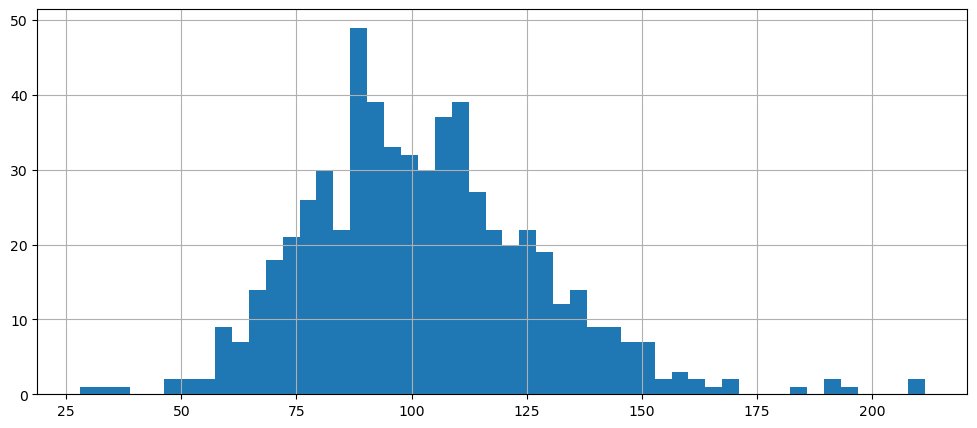

In [97]:
average_frequency_rate_by_customer.groupby('customer_id')['amount'].sum().hist(bins=50, figsize=(12,5))

<AxesSubplot:>

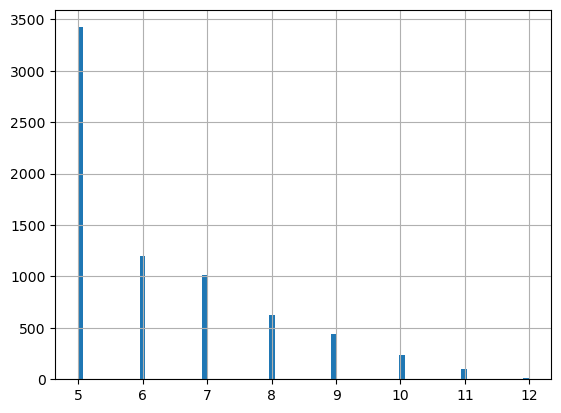

In [101]:
average_frequency_rate_by_customer[average_frequency_rate_by_customer['amount'] > 3.99]['amount'].hist(bins=80)